<a href="https://colab.research.google.com/github/Ayikoandrew/Andrej-ml-class/blob/main/movie_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Classifying movie reviews: A binary classification example***

In [ ]:
import os

os.environ['KERAS_BACKEND'] = 'jax'
import keras
from keras.datasets import imdb
from keras import layers

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
key_word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in key_word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]
)

In [ ]:
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [ ]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
  results = np.zeros((len(sequences), num_classes))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.0
  return results

x_train = multi_hot_encode(train_data, 10000)
x_test = multi_hot_encode(test_data, 10000)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [ ]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype("float32")

In [ ]:
y_train.shape

(25000,)

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:


indice_permutation = np.random.permutation(len(x_train))

shuffle_x_train = x_train[indice_permutation]
shuffle_y_train = y_train[indice_permutation]

num_val_sample = int(0.3 * len(x_train))

val_x_train = shuffle_x_train[:num_val_sample]
val_y_train = shuffle_y_train[:num_val_sample]

training_inputs = shuffle_x_train[num_val_sample:]
testing_inputs = shuffle_y_train[num_val_sample:]

history = model.fit(
    training_inputs,
    testing_inputs,
    epochs=20,
    batch_size=512,
    validation_data=(val_x_train, val_y_train)
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.6932 - loss: 0.6279 - val_accuracy: 0.8708 - val_loss: 0.3982
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8880 - loss: 0.3367 - val_accuracy: 0.8965 - val_loss: 0.2865
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9276 - loss: 0.2209 - val_accuracy: 0.8997 - val_loss: 0.2633
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9485 - loss: 0.1677 - val_accuracy: 0.8977 - val_loss: 0.2667
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9582 - loss: 0.1351 - val_accuracy: 0.8964 - val_loss: 0.2722
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9708 - loss: 0.1064 - val_accuracy: 0.8928 - val_loss: 0.2873
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9799 - loss: 0.0854 - val_accuracy: 0.8904 - val_loss: 0.3101
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9841 - loss: 0.0710 - val_accuracy: 0.8875 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

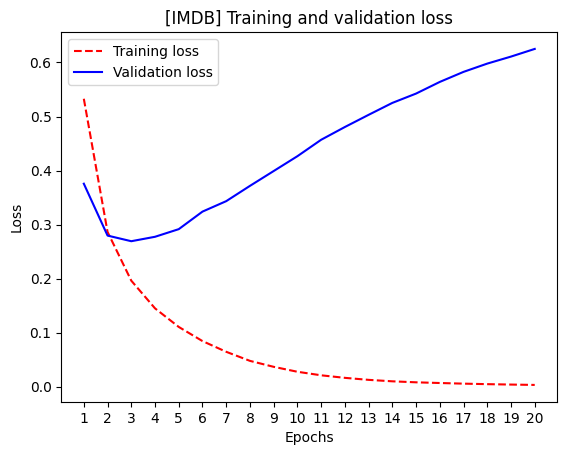

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'r--', label="Training loss")

plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

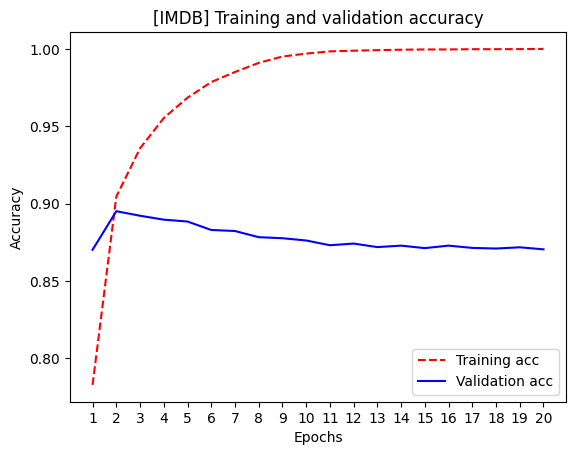

In [ ]:
plt.clf()
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'r--', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
)

results = model.evaluate(val_x_train, val_y_train)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6865 - loss: 0.6023
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9124 - loss: 0.2598
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9426 - loss: 0.1757
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9584 - loss: 0.1361
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9742 - loss: 0.0998


In [ ]:
results

[0.10347595810890198, 0.9729333519935608]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[0.19152878],
       [0.9990331 ],
       [0.7289147 ],
       ...,
       [0.0913661 ],
       [0.04313675],
       [0.7308202 ]], dtype=float32)

In [ ]:
model.save_weights(".weights.h5")

# *Further experiments*

# Three representation layers

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.BinaryCrossentropy()]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
    validation_data=(val_x_train, val_y_train),
)


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

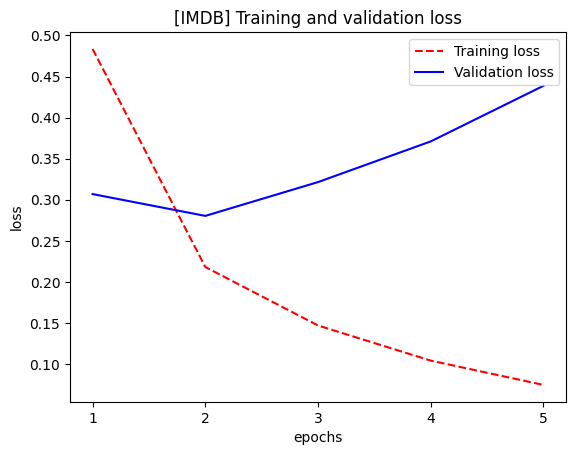

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'r--', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("[IMDB] Training and validation loss")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

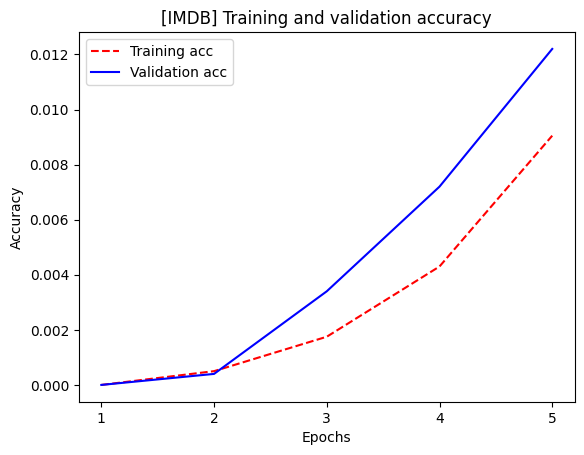

In [ ]:
plt.clf()
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'r--', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# JAX version

In [ ]:
! pip install -U flax

In [ ]:
import jax
from flax.nnx import Module, Linear, BatchNorm, Dropout, Param, Variable
from flax import nnx
from jax import numpy as jnp
import numpy as np
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
key_word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for key, value in key_word_index.items()])

decoded_view = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_view

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

In [ ]:
x_train = multi_hot_encode(train_data, 10000)
x_test = multi_hot_encode(test_data, 10000)

y_train = jnp.array(train_labels.astype('float32'))
y_test = jnp.array(test_labels.astype("float32"))

In [ ]:
class LinearModel(nnx.Module):
  def __init__(self, din: int, dout: int, *, rngs: nnx.Rngs):
     self.W = nnx.Param(rngs.params.uniform((din, dout)))
     self.b = nnx.Param(jnp.zeros((dout, )))
     self.din, self.dout = din, dout

  def __call__(self, x: jax.Array):
    return x @ self.W + self.b

In [ ]:
model = LinearModel(2, 5, rngs=nnx.Rngs(params=0))

y = model(jnp.zeros(shape=(1, 2)))
print(y)

nnx.display(model)

[[0. 0. 0. 0. 0.]]


In [ ]:
class Count(nnx.Variable): pass

class Counter(nnx.Module):
  def __init__(self):
    self.count = Count(jnp.array(0))

  def __call__(self):
    self.count.value += 1

counter = Counter()
print(f"{counter.count.value}")
counter()
print(f"{counter.count.value}")

0
1


In [ ]:
class MLP(nnx.Module):
  def __init__(self, din: int, dim: int, dout: int, *, rngs: nnx.Rngs):
    self.linear1 = nnx.Linear(din, dim, rngs=rngs)
    self.dropout = nnx.Dropout(rate=0.1, rngs=rngs)
    self.bn = nnx.BatchNorm(dim, rngs=rngs)
    self.linear2 = nnx.Linear(dim, dout, rngs=rngs)

  def __call__(self, x: jax.Array):
    x = nnx.gelu(self.dropout(self.bn(self.linear1(x))))
    return self.linear2(x)


model = MLP(2, 16, 5, rngs=nnx.Rngs(0))

y = model(jnp.zeros((3, 2)))

print(y)

nnx.display(model)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
class LoraParam(Param): pass

class LoraLinear(Module):
  def __init__(self, linear: Linear, rank: int, *, rngs: nnx.Rngs):
    self.linear = linear
    self.A = LoraParam(rngs.normal((linear.in_features, rank)))
    self.B = LoraParam(rngs.normal((rank, linear.out_features)))

  def __call__(self, x: jax.Array):
    return self.linear(x) + x @ self.A @ self.B

rngs = nnx.Rngs(0)

model = MLP(2, 16, 1, rngs=rngs)

# Model surgery
model.linear1 = LoraLinear(model.linear1, 4, rngs=rngs)
model.linear2 = LoraLinear(model.linear2, 4, rngs=rngs)


y = model(jnp.zeros((3, 2)))

nnx.display(model)

In [ ]:
from flax import nnx
import jax
from jax import numpy as jnp
from keras.datasets import mnist
import numpy as np
import optax
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()


x_train = train_data.reshape((60000, 28*28)) // 255
x_label = train_label.astype('float32')

y_test = test_data.reshape((10000, 28*28)) // 255
y_label = test_label.astype('float32')


indices = np.random.permutation(len(train_label))

x_train = x_train[indices]
x_label = x_label[indices]

In [ ]:
class Dense(Module):
  def __init__(self, din: int, dout: int, activation=nnx.relu, has_activation=False, *, rngs=nnx.Rngs):
    self.W = nnx.Param(rngs.params.uniform((din, dout)))
    self.b = nnx.Param(jnp.zeros(shape=(dout,)))
    self.activation = activation
    self.has_activation = has_activation

  def __call__(self, x: jax.Array):
    if self.has_activation:
      return self.activation(x @ self.W + self.b)
    return x @ self.W + self.b

class Sequential(Module):
  def __init__(self, layers: Layer):
    self.layers = nnx.List(layers)

  def __call__(self, x: jax.Array):
    for layer in self.layers:
      x = layer(x)
    return x

In [ ]:

rngs = nnx.Rngs(0)
model = Sequential(
    [
        Dense(28*28, 512, has_activation=True ,rngs=rngs),
        Dense(512, 16, has_activation=True,rngs=rngs),
        Dense(16, 10, rngs=rngs)
    ]
)

y = model(jnp.ones((10,784)))
nnx.display(model)

In [ ]:
learning_rate = 0.01
momentum = 0.9

optimizer = nnx.Optimizer(
    model,
    optax.adamw(learning_rate, momentum),
    wrt=nnx.Param
  )

metrics = nnx.MultiMetric(
    accuracy=nnx.metrics.Accuracy(),
    loss=nnx.metrics.Average('loss')
)

nnx.display(model)


In [ ]:
def loss_fn(model, inputs, labels):
  logits = model(inputs)
  loss = optax.softmax_cross_entropy(logits=logits, labels=labels).mean()
  return loss, logits

@nnx.jit
def train_step(model, optimizer: nnx.Optimizer, metrics: nnx.MultiMetric, inputs, labels):
  grad_fn = jax.value_and_grad(loss_fn, has_aux=True)

  (loss, logits), grads = grad_fn(model, inputs, labels)
  metrics.update(loss=loss, logits=logits, labels=labels)
  optimizer.update(grad_wrt_inputs)

@nnx.jit
def eval_step(model, metrics: nnx.MultiMetric, inputs, labels):
  loss, logits = loss_fn(model, inputs, labels)
  metrics.update(loss=loss, logits=logits, labels=labels)


In [ ]:
metrics_history = {
'train_loss': [],
'train_accuracy': [],
'test_loss': [],
'test_accuracy': [],
}

for step, batch in enumerate(x_train.as_numpy_iterator()):
  model.train()
  train_step(model, optimizer, metrics, x_train, x_label)

  if step > 0 and (step % eval_every == 0 or step == train_steps - 1):
    for metric, value in metrics.compute().items():
      metrics_history[f'train_{metric}'].append(value)
    metrics.reset()

    model.eval()
    for test_batch in y_test.as_numpy_iterator():
      eval

Epoch 1/10


TypeError: train_step() takes 4 positional arguments but 5 were given